In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve,confusion_matrix, classification_report , accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score


In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'] = df['Outcome'].map({0 : 0, 1 :1})

No handles with labels found to put in legend.


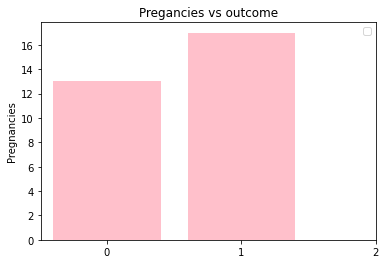

In [7]:
plt.bar(df['Outcome'],df['Pregnancies'], color = 'pink')
plt.title("Pregancies vs outcome")
#plt.xlabel('Outcome')
plt.xticks([0,1,2])
plt.ylabel('Pregnancies')
plt.legend()
plt.show()

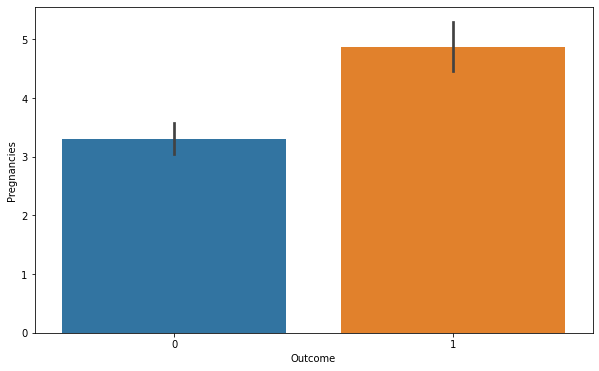

In [8]:
import seaborn as sns

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Outcome', y = 'Pregnancies', data = df)

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

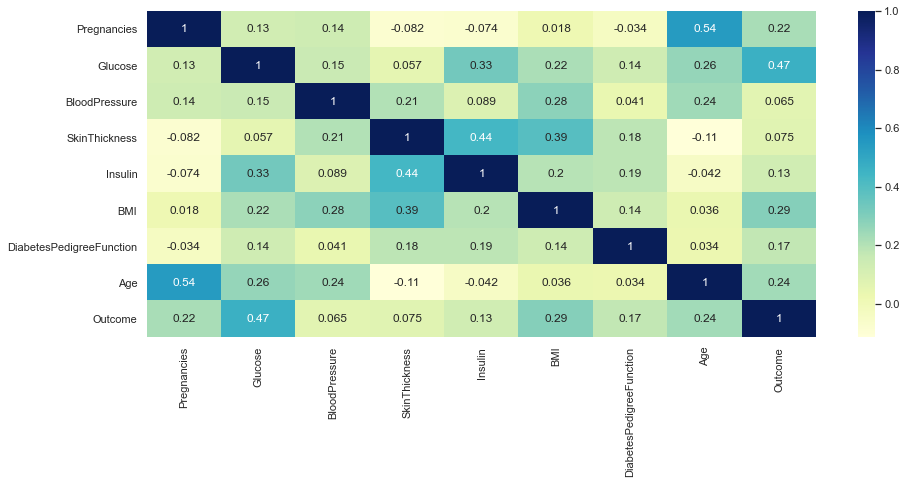

In [10]:
sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(df.corr(), cmap = "YlGnBu", annot =True)
plt.show()

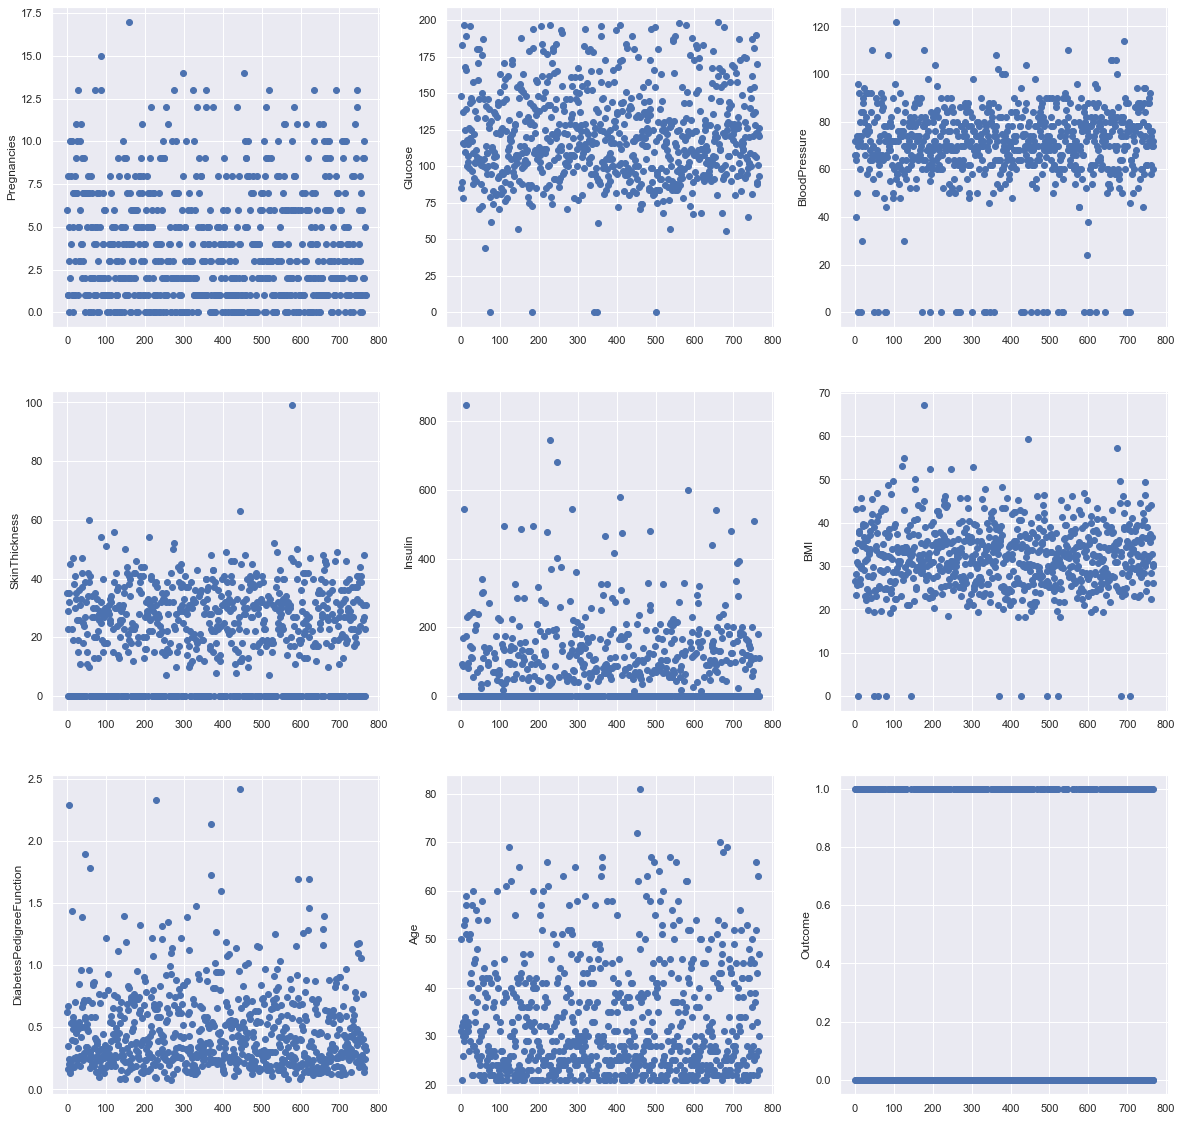

In [11]:
#### Visualizing numeric columns ######

numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 3
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

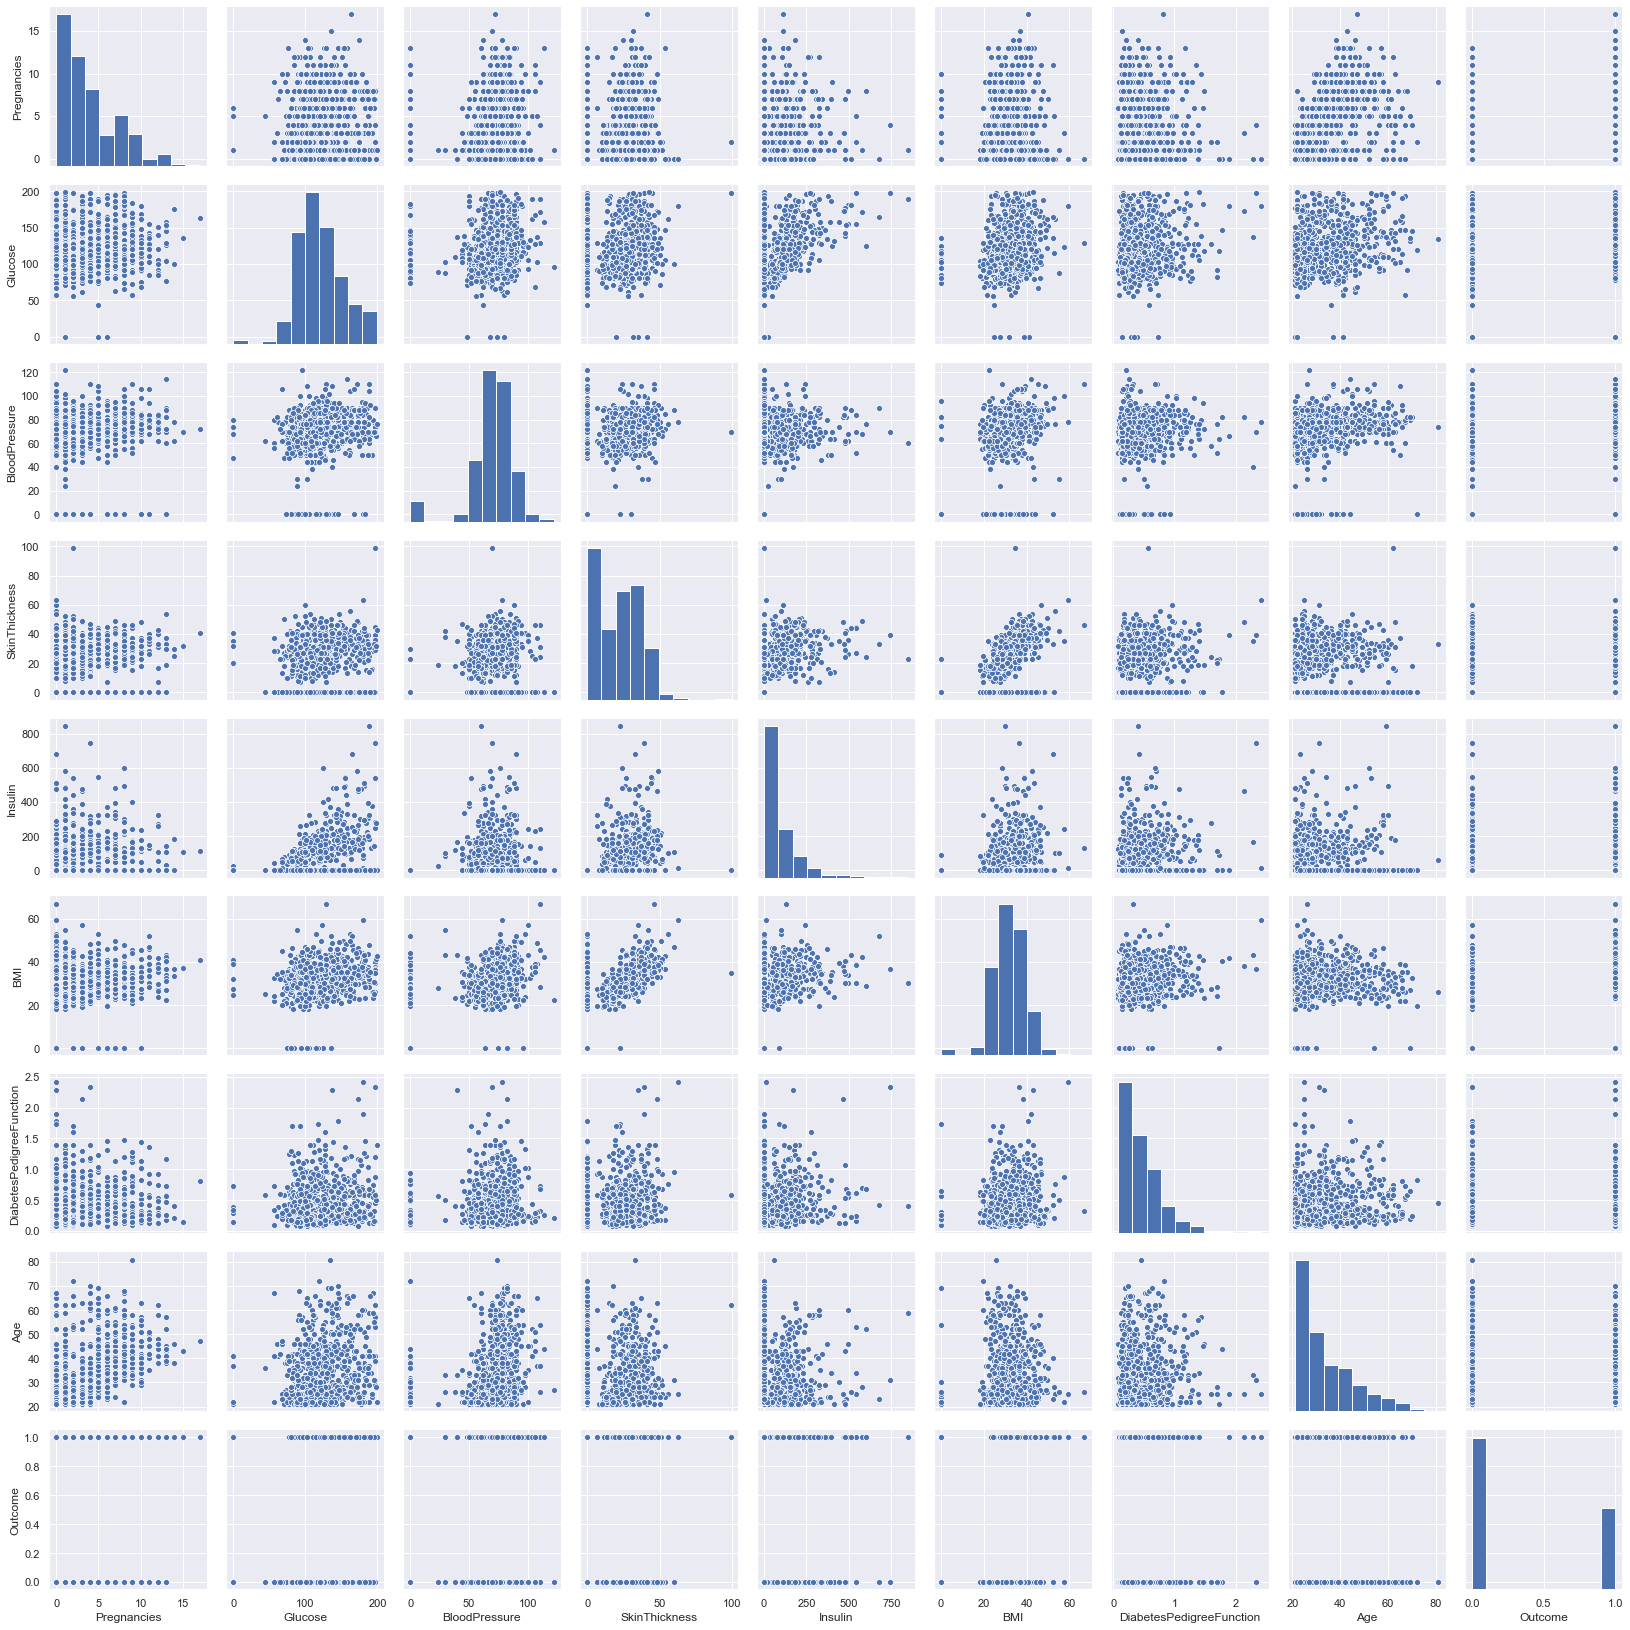

In [12]:
sns.pairplot(df)

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
x.shape

(768, 8)

In [15]:
y.shape

(768,)

In [35]:
##Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=10)

In [36]:
# from sklearn.preprocessing import StandardScalar
# Scalar=StandardScalar()
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [38]:

x_train

array([[-0.53788077, -0.98266127,  1.07584045, ...,  0.19662751,
        -0.51280558,  0.74882677],
       [ 0.06137644,  0.74886132,  0.81461495, ..., -0.39218237,
        -0.8218938 , -0.52209603],
       [ 1.85914807, -0.31435431,  0.03093844, ..., -0.57138538,
        -0.96593491,  0.57937039],
       ...,
       [-0.23825217, -0.16246636,  0.23991884, ..., -0.72498795,
        -1.06796403, -0.77628059],
       [-0.83750938, -1.01303886, -2.05886558, ...,  2.94867368,
         0.09936914, -0.60682422],
       [ 0.36100504, -0.77001815,  0.23991884, ...,  0.20942772,
         1.60279824,  0.83355495]])

In [39]:
x_test

array([[ 0.06137644,  0.99188203,  0.13542864, ..., -0.08497722,
        -0.37476618,  0.32518583],
       [-0.53788077, -0.28397672,  0.86686005, ...,  0.82383803,
        -0.65084498, -0.43736785],
       [-0.83750938,  0.41470783, -0.80498317, ..., -0.6737871 ,
         0.67253273,  2.44339049],
       ...,
       [-0.23825217,  0.87037167,  0.34440904, ..., -1.40339934,
        -0.76787838,  0.32518583],
       [-0.23825217,  0.26281989, -0.28253216, ..., -1.13459483,
        -0.44678674, -0.94573696],
       [-1.13713798, -0.40548708, -0.07355176, ..., -0.59698581,
         0.97261838, -0.0984551 ]])

In [40]:
from sklearn.linear_model import LogisticRegression
# creating the model
model = LogisticRegression(random_state=89)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7783985102420856
Testing accuracy : 0.7445887445887446
              precision    recall  f1-score   support

           0       0.75      0.90      0.81       144
           1       0.74      0.49      0.59        87

    accuracy                           0.74       231
   macro avg       0.74      0.70      0.70       231
weighted avg       0.74      0.74      0.73       231

[[129  15]
 [ 44  43]]


In [ ]:
#hyperparametr tuning for logistic regression


In [41]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier(random_state=42)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7186147186147186


In [67]:

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.7782320055904961

In [60]:
model_randomforest= RandomForestClassifier(n_estimators = 150,random_state=6)

In [61]:
from sklearn.ensemble import RandomForestClassifier

# creating the model


# feeding the training set into the model
model_randomforest.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7619047619047619


In [62]:
# Providing the different values of hyperparameters
#model2 = RandomForestClassifier(random_state=64)
param_dist = {'max_depth': [2, 3, 4, 8],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(model_randomforest, cv = 10,
                     param_grid=param_dist, verbose = True,
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   25.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done 640 out of 640 | elapsed:  1.6min finished


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=150, random_state=6),
             n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=True)

In [63]:
print("the parameters are",cv_rf.best_params_)

the parameters are {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}


In [64]:
#Finally the best parameters are specified

model2.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  bootstrap =  True,
                  max_depth = 8)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))


Training accuracy : 1.0
Testing accuracy : 0.7619047619047619


In [65]:
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.7619047619047619